# Arboles de Decisión

In [ ]:
# Lectura de data
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/maxalonzohuaman/datasets/main/iris.csv")
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Variables independientes y dependiente
x = data[["SepalLength","SepalWidth","PetalLength","PetalWidth"]] # Independientes o coraviables
y = data["Species"] # Dependiente

In [ ]:
# Train y test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) # test 20%
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(150, 4)
(120, 4)
(30, 4)


In [ ]:
# Entrenar el modelo
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(x_train, y_train)
modelo

DecisionTreeClassifier(max_depth=3)

In [ ]:
# Predicciones
sl, sw, pl, pw = 5.0,	3.2, 1.2,	0.3
modelo.predict([[sl, sw, pl, pw]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [ ]:
# Evaluacion modelo
y_pred = modelo.predict(x_test)
y_pred # "y" pronosticado
y_test # "y" real
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9666666666666667

In [ ]:
# Visualización de arbol en forma de texto
from sklearn import tree
text_representation = tree.export_text(modelo, feature_names = list(x.columns))
print(text_representation)

|--- PetalLength <= 2.60
|   |--- class: Iris-setosa
|--- PetalLength >  2.60
|   |--- PetalWidth <= 1.75
|   |   |--- PetalLength <= 4.95
|   |   |   |--- class: Iris-versicolor
|   |   |--- PetalLength >  4.95
|   |   |   |--- class: Iris-virginica
|   |--- PetalWidth >  1.75
|   |   |--- class: Iris-virginica



[Text(0.4, 0.875, 'PetalLength <= 2.6\ngini = 0.667\nsamples = 120\nvalue = [41, 39, 40]\nclass = Iris-setosa'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = Iris-setosa'),
 Text(0.6, 0.625, 'PetalWidth <= 1.75\ngini = 0.5\nsamples = 79\nvalue = [0, 39, 40]\nclass = Iris-virginica'),
 Text(0.4, 0.375, 'PetalLength <= 4.95\ngini = 0.201\nsamples = 44\nvalue = [0, 39, 5]\nclass = Iris-versicolor'),
 Text(0.2, 0.125, 'gini = 0.051\nsamples = 38\nvalue = [0, 37, 1]\nclass = Iris-versicolor'),
 Text(0.6, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Iris-virginica'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]\nclass = Iris-virginica')]

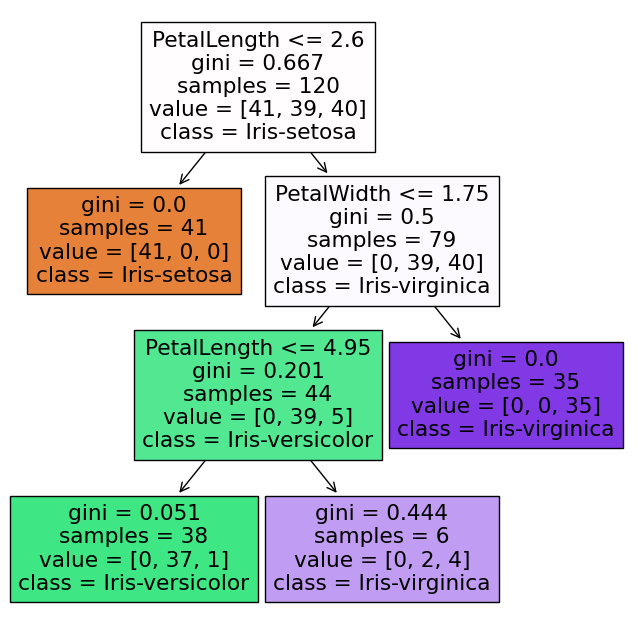

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8, 8))
tree.plot_tree(modelo,
               filled = True,
               feature_names = x.columns,
               class_names = modelo.classes_)

<Axes: >

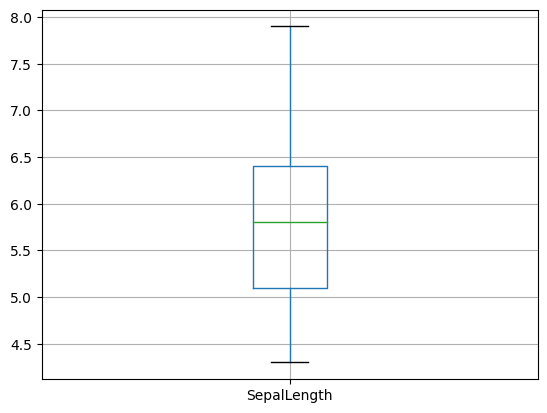

In [ ]:
# Deteccion de valores atipicos
# Diagrama de caja y bigotes (boxplot)
data.boxplot(column = ["SepalLength"])

In [ ]:
# Valores perdidos a iris
data.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [ ]:
# Ejemplo de deteccion de valores perdidos
import numpy as np
df_dic = {
    "edad":[20, 25, 30, np.nan],
    "ingresos":[np.nan, 1, 3, 4],
    "nro_dep":[1,2,3,4]
}
df = pd.DataFrame(df_dic)
df

,edad,ingresos,nro_dep
0,20.0,NaN,1
1,25.0,1.0,2
2,30.0,3.0,3
3,NaN,4.0,4


In [ ]:
df.isnull().sum()

edad        1
ingresos    1
nro_dep     0
dtype: int64

# PLN

### Sin librerias de PLN

In [ ]:
# Divir un texto en palabras (aproximación de tokenización)
text1 = "El gato come ratones, los ratones comen queso y el queso sale de la vaca."
len(text1) # tamaño de text1
text2 = text1.split(" ")
text2
len(text2) # nro de palabras el texto1

['El',
 'gato',
 'come',
 'ratones,',
 'los',
 'ratones',
 'comen',
 'queso',
 'y',
 'el',
 'queso',
 'sale',
 'de',
 'la',
 'vaca.']

In [ ]:
text3 = "To be or not to be"
text4 = text3.split(" ")
set(text4) # Contabiliza palabras unicas. No toma en cuenta la diferencia entre To y to

['To', 'be', 'or', 'not', 'to', 'be']

In [ ]:
len(set([w.lower() for w in text4])) # Contabilizar palabras unicas

4

### Con NLTK

In [ ]:
# Tokenización

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download("punkt")

texto_a = "El gato come ratones, los ratones comen queso y el queso sale de la vaca."

palabras = word_tokenize(texto_a)
print("Palabras:", palabras)

oraciones = sent_tokenize(texto_a)
print("Oraciones:", oraciones)

Palabras: ['El', 'gato', 'come', 'ratones', ',', 'los', 'ratones', 'comen', 'queso', 'y', 'el', 'queso', 'sale', 'de', 'la', 'vaca', '.']
Oraciones: ['El gato come ratones, los ratones comen queso y el queso sale de la vaca.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
texto_b = "¡Hola! ¿cómo te llamas? me llamo José"
oraciones = sent_tokenize(texto_b)
type(oraciones)

list

In [ ]:
# Stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download("stopwords")

texto = "Aqui un ejemplo de palabras vacias"

palabras = word_tokenize(texto)

palabras_vacias = set(stopwords.words("spanish")) # stopwords
palabras_vacias_texto = [palabra for palabra in palabras if palabra.lower() in palabras_vacias]
palabras_vacias_texto
palabras_filtradas = [palabra for palabra in palabras if palabra.lower() not in palabras_vacias]
palabras_filtradas

['un', 'de']

In [ ]:
# Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
palabras = ["running","runs"]
stems = [st.stem(palabra) for palabra in palabras]
stems

['run', 'run']

In [ ]:
# Contabilizar frecuencia de palabras
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

texto = "LLM es un modelo de reciente aparición y LLM es usado por las grandes Empresas"

palabras = word_tokenize(texto)
frecuencias = FreqDist(palabras)
frecuencias

FreqDist({'LLM': 2, 'es': 2, 'un': 1, 'modelo': 1, 'de': 1, 'reciente': 1, 'aparición': 1, 'y': 1, 'usado': 1, 'por': 1, ...})

In [ ]:
# Analisis sintactico
import nltk
from nltk import CFG

gramatica = CFG.fromstring("""
S -> NP VP
NP -> Det N
VP -> V NP
Det -> "el" | "una"
N -> "leon" | "cebra"
V -> "come"
"""
)

parser = nltk.ChartParser(gramatica)

oracion = "el leon come una cebra".split()

for i in parser.parse(oracion):
  i.pretty_print()

              S                
      ________|____             
     |             VP          
     |         ____|___         
     NP       |        NP      
  ___|___     |     ___|____    
Det      N    V   Det       N  
 |       |    |    |        |   
 el     leon come una     cebra



# Textblob

In [ ]:
!pip install textblob

In [ ]:
# Aplicacion en analisis de sentimientos
from textblob import TextBlob
texto = TextBlob("I am very happy")
texto.sentiment
texto.sentiment.polarity

1.0

# Spacy

In [ ]:
# Instalar paquete
!pip install spacy

In [ ]:
# Tokenizar

# !spacy download es_core_news_sm # descarga modelo en español

import spacy
nlp = spacy.load("es_core_news_sm")
texto = "Barack Obama fue el presidente de Estados Unidos"
doc = nlp(texto)
for token in doc:
  print(token.text, token.lemma_, token.pos_, token.is_stop)

import pandas as pd
columnas = ["text","lemma","POS","stopword"]
filas = list()
for t in doc:
  fila = [t.text, t.lemma_, t.pos_, t.is_stop]
  filas.append(fila)

df = pd.DataFrame(filas, columns = columnas)
df

Barack Barack PROPN False
Obama Obama PROPN False
fue ser AUX True
el el DET True
presidente presidente NOUN False
de de ADP True
Estados Estados PROPN True
Unidos Unidos PROPN False


,text,lemma,POS,stopword
0,Barack,Barack,PROPN,False
1,Obama,Obama,PROPN,False
2,fue,ser,AUX,True
3,el,el,DET,True
4,presidente,presidente,NOUN,False
5,de,de,ADP,True
6,Estados,Estados,PROPN,True
7,Unidos,Unidos,PROPN,False


In [ ]:
# Reconocimiento de entidades
for entidad in doc.ents:
  print(entidad.text, entidad.label_)

Barack Obama PER
Estados Unidos LOC
